In [ ]:
import PIL 
import tensorflow as tf
import keras 
import numpy as np
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.imagenet_utils import decode_predictions 
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import time
import serial

In [ ]:
model = keras.models.load_model('trash_detector.model')

In [ ]:
#Machine Learning Apply
def solve(img):
    original = load_img(img, target_size = (224, 224)) 
    numpy_image = img_to_array(original) 
    image_batch = np.expand_dims(numpy_image, axis = 0) 
    processed_image = preprocess_input(image_batch.copy()) 
    
    CLASSES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
    predictions = model.predict(processed_image)
    return CLASSES[np.argmax(predictions[0])] 

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
running = True
model = keras.models.load_model('trash_detector.model')

In [ ]:
def messageArduino(label):
    arduinodata = serial.Serial("COM4",9600, timeout = 6)
    count = 0
    print(label)
    arduinodata.write(label.encode('utf-8'))
    time.sleep(6)
    count += 1

def classify(img):
    original = load_img(img, target_size = (224, 224)) 
    numpy_image = img_to_array(original) 
    image_batch = np.expand_dims(numpy_image, axis = 0) 
    processed_image = preprocess_input(image_batch.copy()) 
    
    CLASSES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
    predictions = model.predict(processed_image)
    label = np.argmax(predictions[0])
    if label in CLASSES:
        return CLASSES[label]
    return "NONE"

def solve():
  while(running):
      filename = take_photo()
      time.sleep(5)
      # Write line to file
      pred = str(classify(filename))
      with open('/content/drive/MyDrive/DLW/output.txt', 'w') as writefile:
        writefile.write(pred)
      messageArduino(pred)
      print(pred)
      display(Image(filename))

<IPython.core.display.Javascript object>

NONE


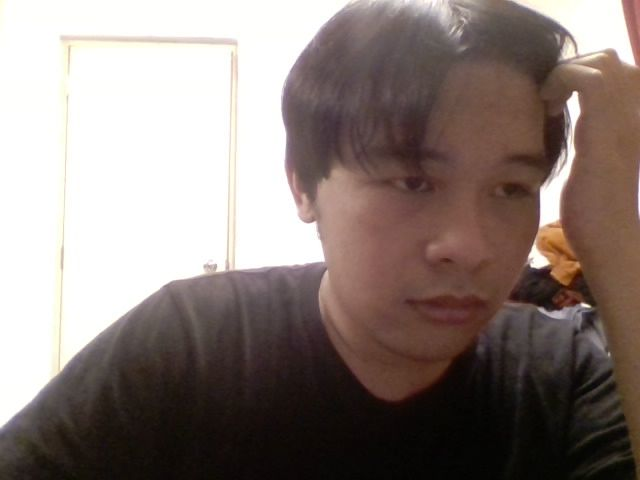

<IPython.core.display.Javascript object>

NONE


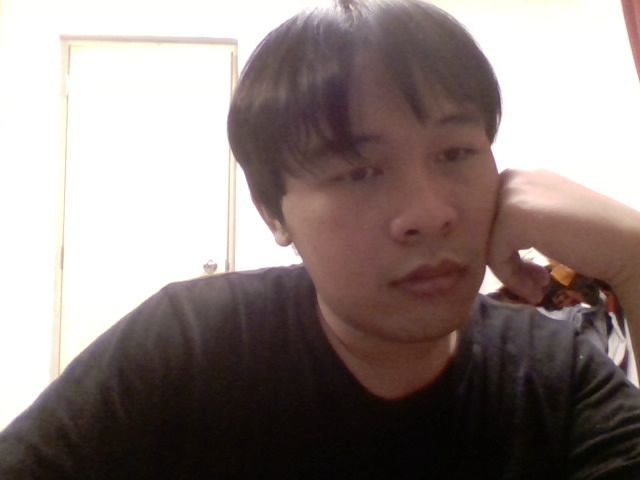

<IPython.core.display.Javascript object>

NONE


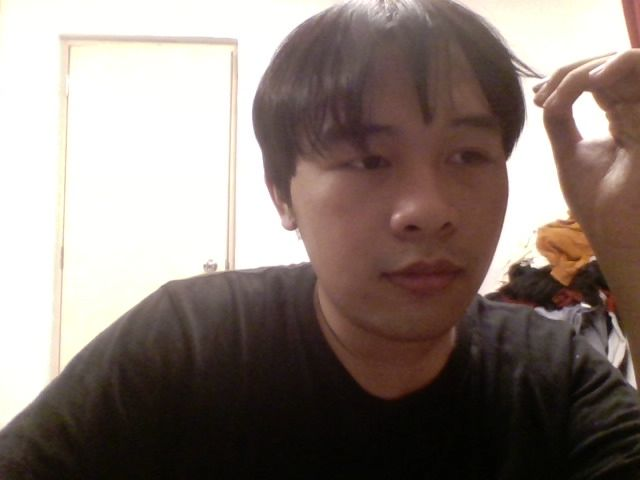

<IPython.core.display.Javascript object>

NONE


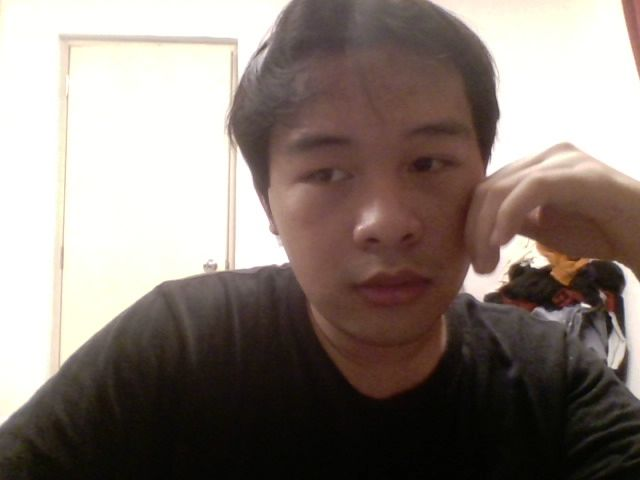

<IPython.core.display.Javascript object>

NONE


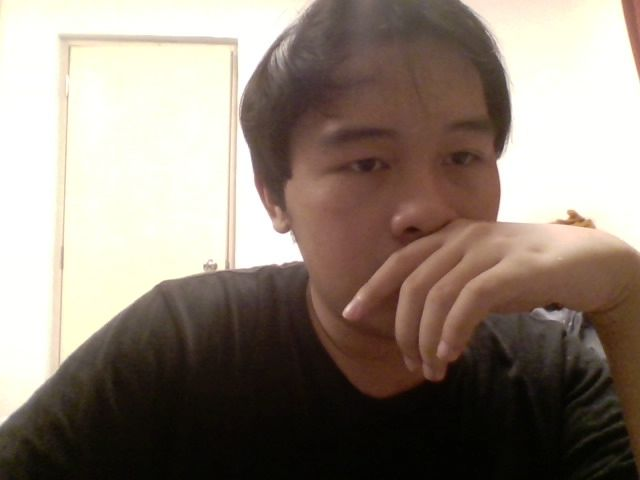

<IPython.core.display.Javascript object>

NONE


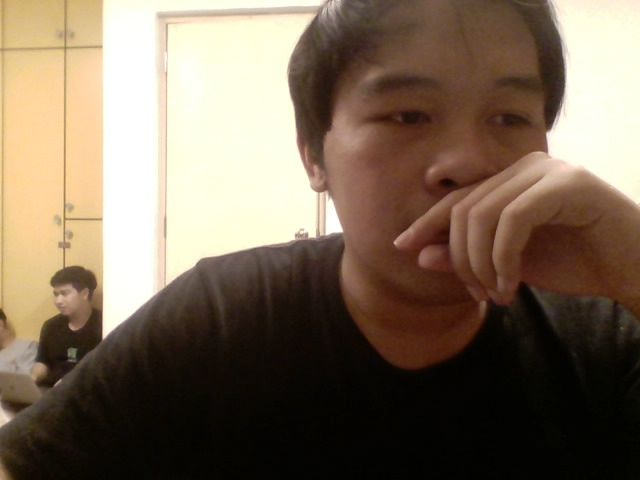

<IPython.core.display.Javascript object>

NONE


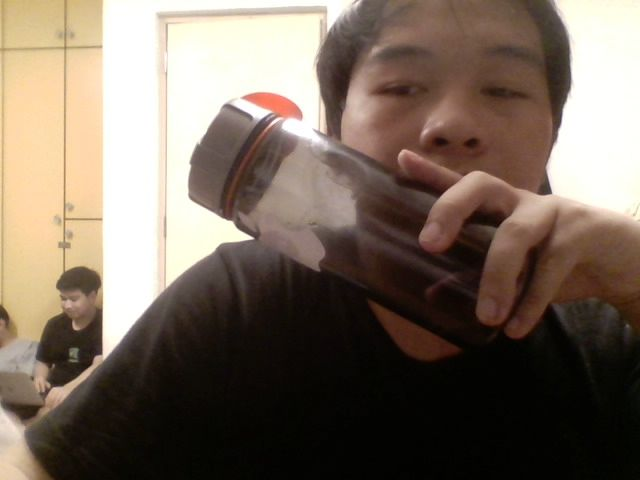

<IPython.core.display.Javascript object>

NONE


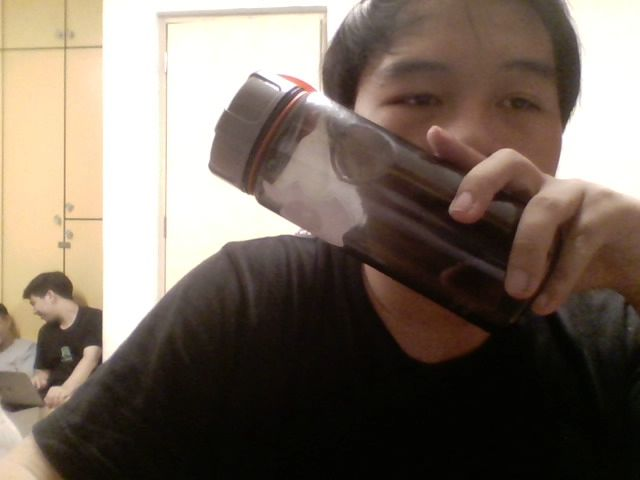

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
solve()

# run this cell to continously take image frames to clasify
# Error because of interrupt